<a href="https://www.kaggle.com/code/rodolphojustino/descriptive-analysis-of-instructors-db?scriptVersionId=119090396" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Author: Rodolpho Justino


## This Dataset shows teaching ratings for professors with different characteristics, we will explore these characteristics and see if there are external influences on the evaluation

## The data used on this study is available on Kaggle under the name of teaching-ratings

The first step is to load the libraries which we will use for the data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from math import sqrt
import statsmodels.api as sm

After the libraries are loaded, we load the data

In [2]:
data_beauty = '/kaggle/input/teaching-ratings-dataset/teachingratings (1).csv'
df = pd.read_csv(data_beauty)
df

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1
2,yes,36,female,more,0.289916,3.6,upper,yes,yes,76,125,1,0,1,1,0,1,1,1
3,yes,36,female,more,0.289916,4.4,upper,yes,yes,77,123,1,1,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,no,37,male,more,0.933396,3.5,upper,yes,yes,15,17,40,1,0,0,0,1,1,1
459,no,58,female,more,0.111563,3.5,upper,yes,yes,26,34,47,1,0,1,0,1,1,1
460,no,42,male,more,-0.900580,4.0,upper,yes,yes,45,86,61,1,0,0,0,1,1,1
461,no,39,male,more,0.643014,4.3,upper,yes,yes,22,29,62,1,0,0,0,1,1,1


## Providing some Description of the Data

* **Minority** describes if the instructor belongs to a non-caucasian group
* **Beauty** describes a rating of the professors physical appearance (Measured by a panel of six students and standardized do a mean of zero
* **Eval** is the course evaluation score, on a scale from 1 to 5, being 5 excellent

The data frame comes with some columns that are binary, like **vismin**, if its 1, then the information is true

A first plot we can use to see how our data is distributed is a histogram

[Text(0, 0, '16'),
 Text(0, 0, '51'),
 Text(0, 0, '94'),
 Text(0, 0, '66'),
 Text(0, 0, '94'),
 Text(0, 0, '42'),
 Text(0, 0, '29'),
 Text(0, 0, '40'),
 Text(0, 0, '11'),
 Text(0, 0, '20')]

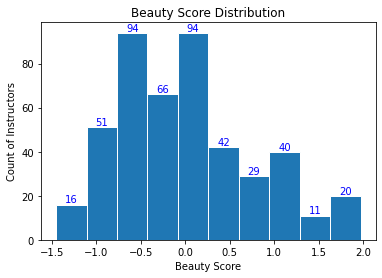

In [3]:
values, bins, bars = plt.hist(df["beauty"], edgecolor = "White")
plt.xlabel("Beauty Score")
plt.ylabel("Count of Instructors")
plt.title("Beauty Score Distribution")
plt.bar_label(bars, fontsize=10, color='blue')

[Text(0, 0, '41'),
 Text(0, 0, '37'),
 Text(0, 0, '58'),
 Text(0, 0, '48'),
 Text(0, 0, '75'),
 Text(0, 0, '74'),
 Text(0, 0, '53'),
 Text(0, 0, '69'),
 Text(0, 0, '0'),
 Text(0, 0, '8')]

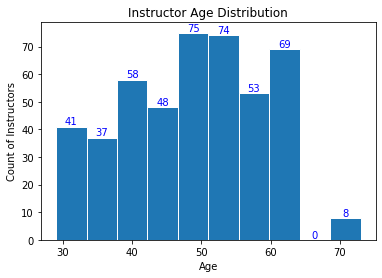

In [4]:
values, bins, bars = plt.hist(df["age"], edgecolor = "White")
plt.xlabel("Age")
plt.ylabel("Count of Instructors")
plt.title("Instructor Age Distribution")
plt.bar_label(bars, fontsize=10, color='blue')

# Checking for patterns in the data

We can see how some scores are dispersed by grouping them, trying for gender

In [5]:
df.groupby("gender").agg({"beauty":["mean","std","var"]}).reset_index()

gender    beauty                   
               mean      std       var
0  female  0.116109  0.81781  0.668813
1    male -0.084482  0.75713  0.573246

## Checking the distribution of the data related to gender

Text(0.5, 1.0, 'Gender distribution Bar Plot')

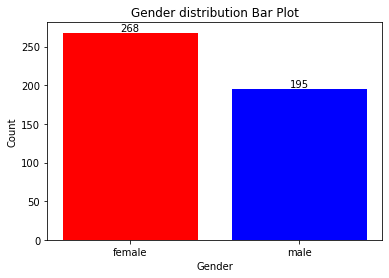

In [6]:
barplot = plt.bar(df.gender.unique(), df.gender.value_counts(), color = ['red','blue'])
plt.bar_label(barplot, labels = df.gender.value_counts(), fontsize = 10)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender distribution Bar Plot')

## Checking if there is a difference in tenure of instructors by gender

In [7]:
#The first step for the check is to group by the characteristics we want to check

tenure_count = df[df.tenure == "yes"].groupby("gender").agg({"tenure":"count"}).reset_index()

#after grouping, we can find the percentual

tenure_count["percentage"] = 100*tenure_count.tenure/tenure_count.tenure.sum()
tenure_count

,gender,tenure,percentage
0,female,145,40.166205
1,male,216,59.833795


From the table above, we check that there is in fact a difference in the amount of instructors by gender, close to 60% of the instructors are male


## We can now check the percentage of instructors that are visible minorities in the df, the procedure is the same as the one above

In [8]:
#The first step for the check is to group by the characteristics we want to check

minority_count = df[df.tenure == "yes"].groupby("minority").agg({"tenure":"count"}).reset_index()

#after grouping, we can find the percentual

minority_count["percentage"] = 100*minority_count.tenure/minority_count.tenure.sum()
minority_count

,minority,tenure,percentage
0,no,307,85.041551
1,yes,54,14.958449


### From the data we check that only 15% of the tenured instructors are minority

In [9]:
#The first step for the check is to group by the characteristics we want to check

native_count = df[df.tenure == "yes"].groupby("native").agg({"tenure":"count"}).reset_index()

#after grouping, we can find the percentual

native_count["percentage"] = 100*native_count.tenure/native_count.tenure.sum()
native_count

,native,tenure,percentage
0,no,28,7.756233
1,yes,333,92.243767


### From the data we check that only 8% of the tenured instructors are non-native

## Checking the relation between age and evaluation in a scatter plot

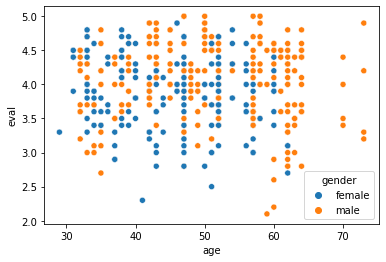

In [10]:
ax = sns.scatterplot (x = "age", y = "eval", hue = "gender", data = df)

There is no clear relation between ange and evaluation based on the information presented in the scattetplot, we keep exploring further

Using CatPlot from seaborn to check some insights from the df

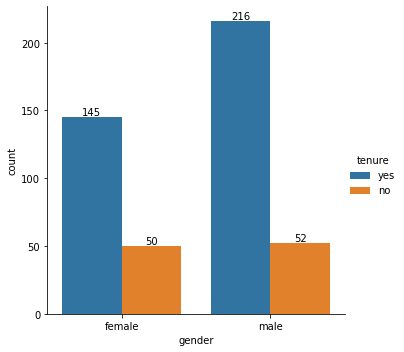

In [11]:
g = sns.catplot(x = "gender", hue = "tenure", kind = "count", data = df)
ax = g.facet_axis (0,0)

for c in ax.containers:
    labels = [f'{(v.get_height())}' for v in c]
    ax.bar_label(c, labels = labels, label_type = 'edge')

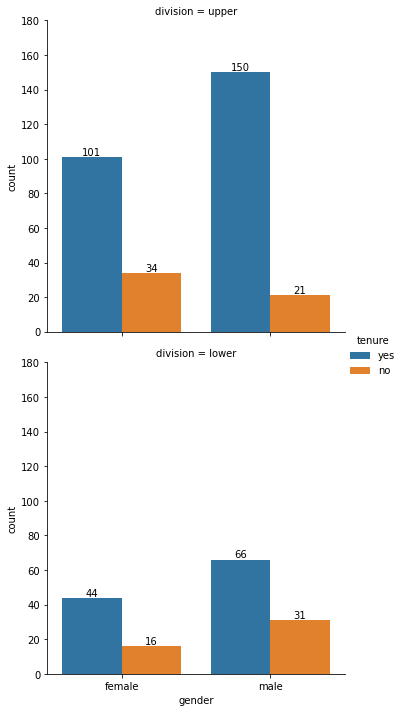

In [12]:
g = sns.catplot(x = "gender", hue = "tenure", row = "division", kind = "count",  data = df)
ax = g.facet_axis (0,0)

for ax in g.axes.ravel():
    
    for c in ax.containers:
        labels = [f'{(v.get_height())}' for v in c]
        ax.bar_label(c, labels = labels, label_type = 'edge')
    ax.margins(y = 0.2)

Checking the age distribution by gender in a boxplot

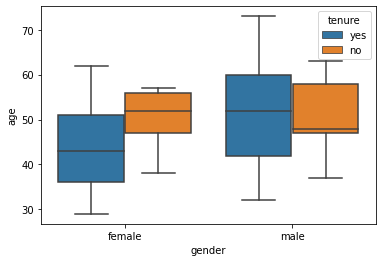

In [13]:
ax = sns.boxplot(x = "gender", y = "age", hue = "tenure", data = df )

## Histogram plots of Teaching evaluation by gender

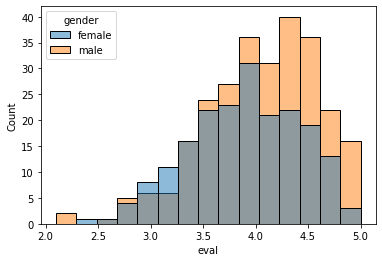

In [14]:
sns.histplot(data = df, x = "eval", hue = "gender")

plt.show()

## Histogram plots of Beauty Score by gender

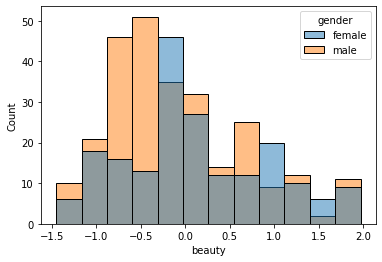

In [15]:
sns.histplot(data = df, x = "beauty", hue = "gender")

plt.show()

## Based on the information seen above, we can conduct some hypothesis testing to check some information

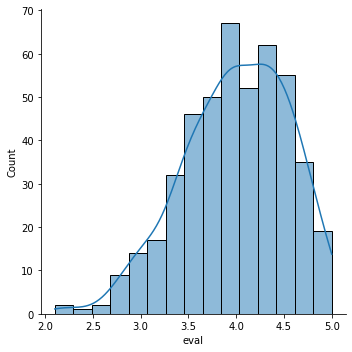

In [16]:
sns.displot(df["eval"], kde = True)

## Are there statistical differences in the evaluation value for Male and Female instructors?

* A first step to check this information is to check if the variances are different, as this information is important for the hypothesis testing of the mean evaluation

* If the value of P is smaller than 0,05, it means that the variances are different, if not, the variances are equal

In [17]:
scipy.stats.levene(df[df["gender"] == "female"]["eval"],
                   df[df["gender"] == "male"]["eval"], center = "mean")

LeveneResult(statistic=0.19032922435292574, pvalue=0.6628469836244741)

Because the value of P is 0.66, which is greater than 0,05, we can assume that the variances are equal

### Are the means of the Instructor evaluations for Male and Female different, or are they statistically equal?

In [18]:
df.groupby("gender").agg({"eval":["mean","std","var"]}).reset_index()

gender      eval                    
               mean       std       var
0  female  3.901026  0.538803  0.290308
1    male  4.069030  0.556652  0.309861

In [19]:
scipy.stats.ttest_ind(df[df["gender"] == "female"]["eval"], df[df["gender"] == "male"]["eval"], equal_var = True)

Ttest_indResult(statistic=-3.249937943510772, pvalue=0.0012387609449522217)

Because the value of P is 0,001, which is smaller than 0,05, we can assume that the means are statistically different, and there is, therefore a difference in the evaluantion of male and female instructor

## Are there statistical differences in the beauty scores for Male and Female instructors?

Here the same steps as the case before are taken, we perform a test on the variances then on the means

In [20]:
scipy.stats.levene(df[df["gender"] == "female"]["beauty"],
                   df[df["gender"] == "male"]["beauty"], center = "mean")

LeveneResult(statistic=0.8231466495663889, pvalue=0.3647357602100747)

As the p-value is 0,36, we can assume the variances are 

In [21]:
df.groupby("gender").agg({"beauty":["mean","std","var"]}).reset_index()

gender    beauty                   
               mean      std       var
0  female  0.116109  0.81781  0.668813
1    male -0.084482  0.75713  0.573246

In [22]:
scipy.stats.ttest_ind(df[df["gender"] == "female"]["beauty"], df[df["gender"] == "male"]["beauty"], equal_var = True)

Ttest_indResult(statistic=2.720898094019281, pvalue=0.006756755691927622)

As the p-value for the means is 0,006, therefore we can assume that the means are different and there is, in fact a difference in the beauty evaluation of male and female instructors and women have a better evaluation than man

## Is there a influence of age in the beauty score evaluation?

* to check this, we need to group by age
* test equality of variance
* perform the ANOVA

In [23]:
df.loc[(df["age"] <= 40), "age_group"] = "40 years and younger"
df.loc[(df["age"] > 40) & (df["age"]< 57), "age_group"] = "between 40 and 57"
df.loc[(df["age"] >= 57), "age_group"] = "57 years and older"

In [24]:
scipy.stats.levene(df[df["age_group"] == "40 years and younger"]["beauty"],
                   df[df["age_group"] == "between 40 and 57"]["beauty"],
                   df[df["age_group"] == "57 years and older"]["beauty"],center = "mean")

LeveneResult(statistic=8.60005668392584, pvalue=0.000215366180993476)

As the p-value is 0,0002, the variances are different

In [25]:
#grouping again, to perform the anova

lower40 = df[df["age_group"] == "40 years and younger"]["beauty"]
from40to57 = df[df["age_group"] == "between 40 and 57"]["beauty"]
above57 = df[df["age_group"] == "57 years and older"]["beauty"]

In [26]:
df.groupby("age_group").agg({"beauty":["mean","std","var"]}).reset_index()

age_group    beauty                    
                             mean       std       var
0  40 years and younger  0.336196  0.913748  0.834936
1    57 years and older -0.245777  0.740720  0.548666
2     between 40 and 57 -0.035111  0.686637  0.471470

In [27]:
f_stat, p_value = scipy.stats.f_oneway(lower40, from40to57, above57)
print("F_statistic: {0}, P-Value: {1}".format(f_stat,p_value))

F_statistic: 17.597558611010122, P-Value: 4.3225489816137975e-08


Because de P-Value is smaller than 0,05, we can assume that at least one of the means is different, therefore, the beauty score is, indeed, affected by the age factor, as youger professors tend to have higher beauty scores

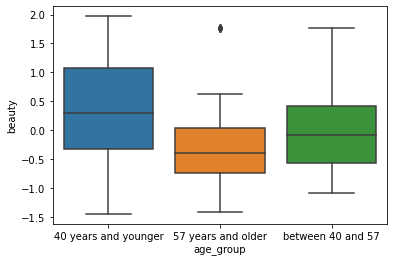

In [28]:
ax = sns.boxplot(x = "age_group", y = "beauty",  data = df )

## Is there a influence of age in the instructor evaluation?

* test equality of variance
* perform the ANOVA

In [29]:
#Test of Variance equality

scipy.stats.levene(df[df["age_group"] == "40 years and younger"]["eval"],
                   df[df["age_group"] == "between 40 and 57"]["eval"],
                   df[df["age_group"] == "57 years and older"]["eval"],center = "mean")

LeveneResult(statistic=3.820237661494229, pvalue=0.02262141852021939)

Because the P-value is smaller than 0,05, we can assume the variances are different 

In [30]:
#grouping to perform and Anova

lower40E = df[df["age_group"] == "40 years and younger"]["eval"]
from40to57E = df[df["age_group"] == "between 40 and 57"]["eval"]
above57E = df[df["age_group"] == "57 years and older"]["eval"]

In [31]:
df.groupby("age_group").agg({"eval":["mean","std","var"]}).reset_index()

age_group      eval                    
                             mean       std       var
0  40 years and younger  4.002655  0.505763  0.255796
1    57 years and older  3.933607  0.624250  0.389688
2     between 40 and 57  4.030702  0.537923  0.289362

In [32]:
f_stat, p_value = scipy.stats.f_oneway(lower40E, from40to57E, above57E)
print("F_statistic: {0}, P-Value: {1}".format(f_stat,p_value))

F_statistic: 1.2226327996572206, P-Value: 0.29540894225417536


Because the P-Value is greater than 0,05, we can say that the Teacher evaluation is not affected by the age group, and the means are equal

## Is there a influence of gender in Instructor Tenure?

* As we are dealing with some categorical values, some different kind of testing is needed

* We create a cross table, and perform a chi-squared test

In [33]:
comp_table = pd.crosstab(df["tenure"], df["gender"])
comp_table

gender,female,male
tenure,,
no,50,52
yes,145,216


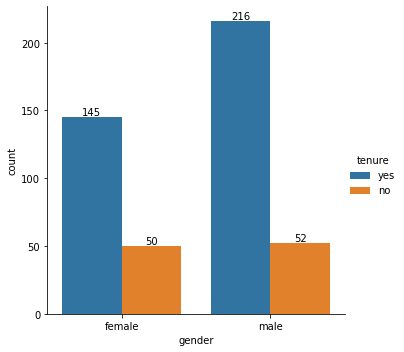

In [34]:
g = sns.catplot(x = "gender", hue = "tenure", kind = "count", data = df)
ax = g.facet_axis (0,0)

for c in ax.containers:
    labels = [f'{(v.get_height())}' for v in c]
    ax.bar_label(c, labels = labels, label_type = 'edge')

In [35]:
#Performing test

g, p, dof, expctd = scipy.stats.chi2_contingency(comp_table, correction = True)
print("F_statistic: {0}, P-Value: {1}".format(g,p))


F_statistic: 2.20678166999886, P-Value: 0.1374050603563787


As the value of P is higher than 0,05, then we can conclude that the gender has no effect on tenure

## Is there a relationship between Beauty and Instructor Evaluation?

first, we group by the beauty score

In [36]:
bins = np.linspace(min(df["beauty"]), max(df["beauty"]),4)
group_names = ["Low", "Medium", "High"]
df["beauty-class"] = pd.cut(df["beauty"], bins, labels = group_names, include_lowest = True)
df[["beauty", "beauty-class"]]

,beauty,beauty-class
0,0.289916,Medium
1,0.289916,Medium
2,0.289916,Medium
3,0.289916,Medium
4,-0.737732,Low
...,...,...
458,0.933396,High
459,0.111563,Medium
460,-0.900580,Low
461,0.643014,Medium


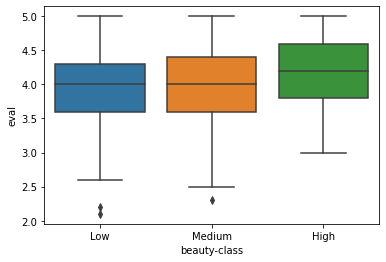

In [37]:
ax = sns.boxplot(x = "beauty-class", y = "eval",  data = df )

We then perform the calculations

In [38]:
F_val, pval = scipy.stats.pearsonr(df["beauty"], df["eval"])
print("F_statistic: {0}, P-Value: {1}".format(F_val,pval))

F_statistic: 0.18903909084045206, P-Value: 4.247115419812485e-05


The result suggests that there is in fact a relationship between beauty and instructor evaluation

## Is there a relationship between Instructor Age and tenure?

In [39]:
comp_table2 = pd.crosstab(df["age_group"], df["tenure"])
comp_table2

tenure,no,yes
age_group,,
40 years and younger,15,98
57 years and older,25,97
between 40 and 57,62,166


In [40]:
g, p, dof, expctd = scipy.stats.chi2_contingency(comp_table2, correction = True)
print("F_statistic: {0}, P-Value: {1}".format(g,p))

F_statistic: 8.749576239010711, P-Value: 0.012590809706820843


The result of a p-value smaller than 0,05 suggest that there is indeed a relationship between Instructor Age and tenure

## Are instructors with a higher beauty score more likely to be tenured?

In [41]:
scipy.stats.levene(df[df["tenure"] == "yes"]["beauty"],
                   df[df["tenure"] == "no"]["beauty"]
                   ,center = "mean")

LeveneResult(statistic=0.4884241652750426, pvalue=0.4849835158609811)

The result suggest that the variances are equal, so, performing the t-test

In [42]:
f,p = scipy.stats.ttest_ind(df[df["tenure"] == "yes"]["beauty"], df[df["tenure"] == "no"]["beauty"], equal_var = True)
print("F_statistic: {0}, P-Value: {1}".format(f,p))

F_statistic: -0.41091752459788644, P-Value: 0.6813239497332835


The result shows that there is no relationship between a higher beauty score and tenure

## Are minorities less likely to be tenured?

In [43]:
comp_table3 = pd.crosstab(df["minority"], df["tenure"])
comp_table3

tenure,no,yes
minority,,
no,92,307
yes,10,54


In [44]:
g, p, dof, expctd = scipy.stats.chi2_contingency(comp_table3, correction = True)
print("F_statistic: {0}, P-Value: {1}".format(g,p))

F_statistic: 1.3675127484429763, P-Value: 0.24223968800237178


The result suggests that there is no such relationship between the characteristics